# Assignment 2
## Saving data in 2 parallel matrices, features(x) and labels(y)

pip install -U scikit-learn

#### Retreiving the x and y array generated in another notebook after encoding the dataset

In [102]:
%store -r X

print(X)

[[18.5 19.7 22.4 ... 18.9 18.6  1. ]
 [23.7 36.3  2.2 ... 26.5 34.1  1. ]
 [18.4 27.5  0.  ... 19.7 24.4  0. ]
 ...
 [10.  20.1  0.  ... 14.3 19.   0. ]
 [ 9.9 25.3  0.  ... 14.4 24.5  0. ]
 [14.4 19.8 13.2 ... 15.4 16.6  1. ]]


In [103]:
%store -r Y
print(Y)

[1 1 1 ... 0 0 0]


In [104]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [105]:
#Splitting dataset matrices into training 80% and testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

## Descision Tree Classifier

In [106]:
#declare default DT classifier
default_model = tree.DecisionTreeClassifier()

#Training it
default_model.fit(X_train, y_train)

print('(Training, Testing) Accuracy Result : ', default_model.score(X_train, y_train), ', ', default_model.score(X_test, y_test))

(Training, Testing) Accuracy Result :  1.0 ,  0.748792270531401


## Performing Random Splits

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

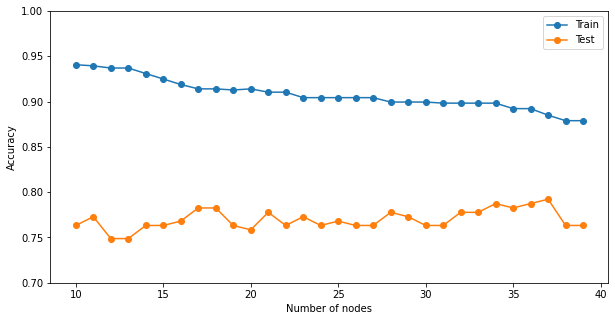

In [108]:
# define lists to collect score
train_scores, test_scores, f1_scores = list(), list(), list()

#defining min_sample_split values
values = [i for i in range(10, 40)]
    
# evaluate a decision tree for each min_sample_split
for i in values:
    #creating the calssifier and adjusting the min_samples_split
    model = tree.DecisionTreeClassifier(min_samples_split=i)

    #Training it
    model.fit(X_train, y_train)

    #appending training accuracy
    train_scores.append(model.score(X_train, y_train))
    
    #appending testing accuracy
    test_scores.append(model.score(X_test, y_test))

    #Making predictions
    y_pred = model.predict(X_test)
    #appending the f1_score
    f1_scores.append(f1_score(y_test, y_pred,))
    
    # print('(Training, Testing) Accuracy Result ' ,i+1,': ', model.score(X_train, y_train), ', ', model.score(X_test, y_test))


# plot of accuracy vs 'numbed of nodes'
plt.figure(figsize=(10,5))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')

plt.xlabel("Number of nodes")
plt.ylabel("Accuracy")

plt.axis([None, None, 0.7, 1.0])
plt.legend()
plt.show()


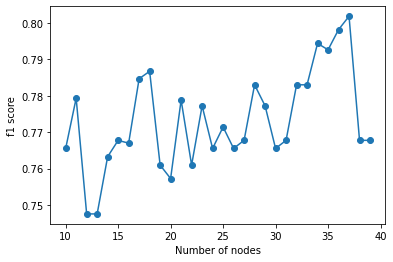

In [109]:
#plotting f1 score graph
plt.xlabel("Number of nodes")
plt.ylabel("f1 score")
plt.plot(values, f1_scores,'-o')
plt.show()

### Based on the f1_score metric we will calculate the best min_sample_split to continue of with

In [110]:
print("Best min_sample_split value:")
max_f1_score = max(f1_scores)
index = f1_scores.index(max_f1_score)
best_min_sample_split = values[index]
print('min_Samples_split : ', best_min_sample_split)
print('f1_score : ', max_f1_score)
print('train_accuracy : ', train_scores[index])
print('testing_accuracy : ', test_scores[index])


Best min_sample_split value:
min_Samples_split :  37
f1_score :  0.8018433179723502
train_accuracy :  0.8849878934624698
testing_accuracy :  0.7922705314009661


### Adjusting the max_depth hyper parameter of the Decision Tree to get the best tree. 

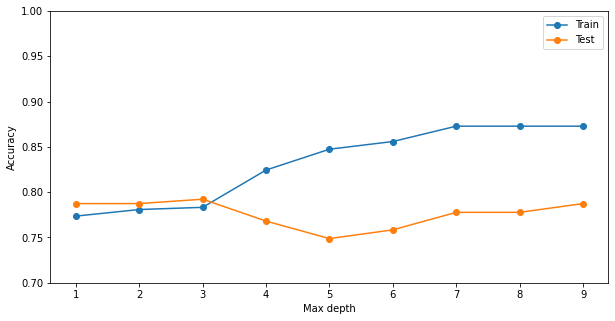

In [111]:
# define lists to collect score
train_scores, test_scores, f1_scores = list(), list(), list()

#defining max_depth values
max_depth_values = [i for i in range(1, 10)]
    
# evaluate a decision tree for each max_depth
for i in max_depth_values:
    #creating the calssifier and adjusting the min_samples_split
    adjusted_model = tree.DecisionTreeClassifier(min_samples_split=best_min_sample_split, max_depth=i)

    #Training it
    adjusted_model.fit(X_train, y_train)

    #appending training accuracy
    train_scores.append(adjusted_model.score(X_train, y_train))
    
    #appending testing accuracy
    test_scores.append(adjusted_model.score(X_test, y_test))

    #Making predictions
    y_pred = adjusted_model.predict(X_test)
    #appending the f1_score
    f1_scores.append(f1_score(y_test, y_pred,))
    
    # print('(Training, Testing) Accuracy Result ' ,i+1,': ', model.score(X_train, y_train), ', ', model.score(X_test, y_test))


# plot of accuracy vs 'numbed of nodes'
plt.figure(figsize=(10,5))

plt.plot(max_depth_values, train_scores, '-o', label='Train')
plt.plot(max_depth_values, test_scores, '-o', label='Test')

plt.xlabel("Max depth")
plt.ylabel("Accuracy")

plt.axis([None, None, 0.7, 1.0])
plt.legend()
plt.show()

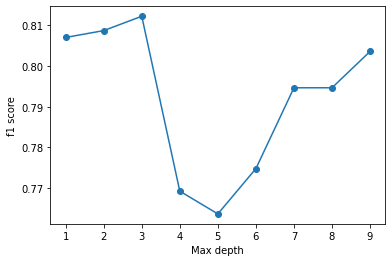

In [112]:
#plotting f1 score graph
plt.xlabel("Max depth")
plt.ylabel("f1 score")
plt.plot(max_depth_values, f1_scores,'-o')
plt.show()

### Based on the f1_score metric we will calculate the best max_depth to continue of with

In [113]:
print("Best max_depth value:")
max_f1_score = max(f1_scores)
index = f1_scores.index(max_f1_score)
best_max_depth = max_depth_values[index]
print('max_dept : ', best_max_depth)
print('f1_score : ', max_f1_score)
print('train_accuracy : ', train_scores[index])
print('testing_accuracy : ', test_scores[index])

Best max_depth value:
max_dept :  3
f1_score :  0.8122270742358079
train_accuracy :  0.7832929782082324
testing_accuracy :  0.7922705314009661


## Plotting best fitted tree 

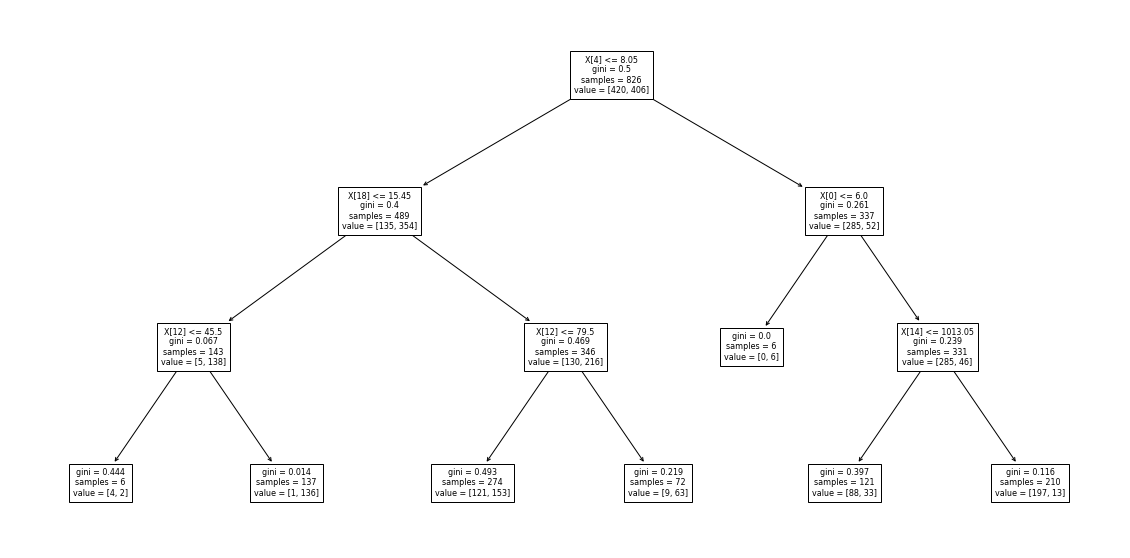

In [114]:
clf = tree.DecisionTreeClassifier(min_samples_split=best_min_sample_split, max_depth=best_max_depth)

#Training it
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(clf, fontsize=8)
plt.show()

## K-Fold Cross Validation

In [115]:
from sklearn.model_selection import cross_validate

model = tree.DecisionTreeClassifier(min_samples_split=10, max_depth=6)
cv_result = cross_validate(model, X, Y, cv=5)

print(cv_result)

{'fit_time': array([0.0059824 , 0.00401139, 0.00398779, 0.00398779, 0.00399065]), 'score_time': array([0.        , 0.        , 0.00100136, 0.00099945, 0.0010016 ]), 'test_score': array([0.68599034, 0.70531401, 0.68599034, 0.77669903, 0.80097087])}
